<a href="https://colab.research.google.com/github/mangaorphy/-Matplotlib-Seaborn/blob/main/seaborn_matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/fuel_econ.csv'
df = pd.read_csv(path)
df.head(6)
df.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


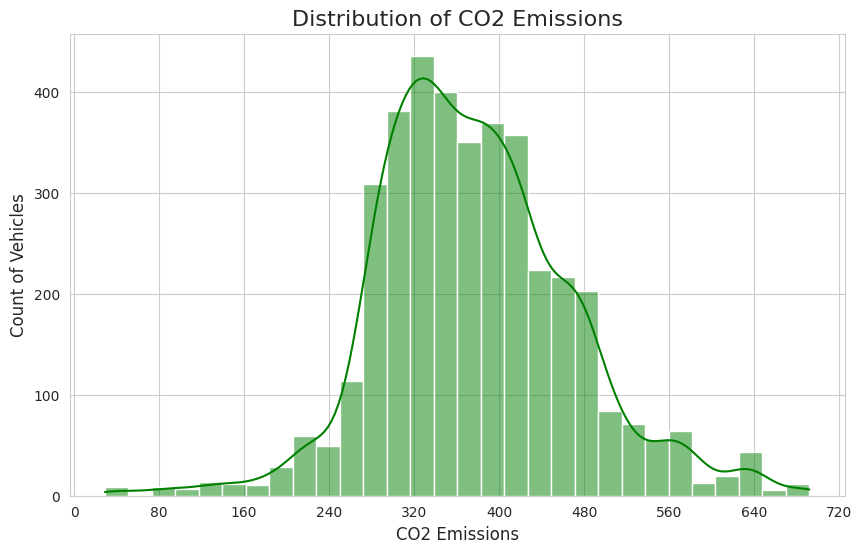

In [12]:
# Set style for better aesthetics
sns.set_style("whitegrid")

# Create histogram for CO2 emissions
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='co2', bins=30, kde=True, color='green')

# Customize the plot
plt.title('Distribution of CO2 Emissions', fontsize=16)
plt.xlabel('CO2 Emissions', fontsize=12)
plt.ylabel('Count of Vehicles', fontsize=12)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Show plot
plt.show()



***INTERPRETATION & DECISION-MAKING INSIGHTS:***

**The CO2 emissions histogram reveals:**
1. The distribution is unimodal with a right skew (most vehicles clustered at lower emissions)
2. Majority of vehicles emit between 300-600 grams/mile of CO2
3. There's a long tail of high-emission vehicles (500-800 grams/mile)
4. The KDE curve shows the skewness is more pronounced than with MPG

**ACTIONABLE DECISIONS:**
1. Target vehicles above 500g/mile for emission reduction programs
2. The skew suggests most manufacturers are already optimizing for lower emissions

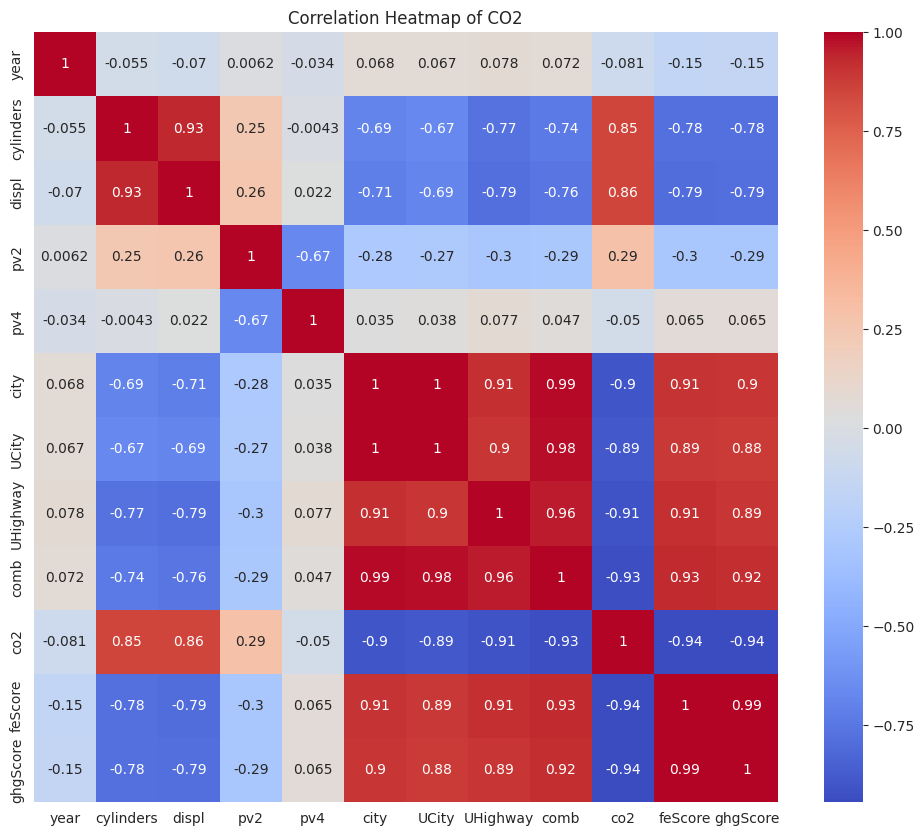

In [18]:
num_data = df.select_dtypes(include=np.number) # Select only the columns with numerical data from my dataset.
# drop the id column
num_data = num_data.drop(columns=['id'])
# drop the highway column because it is highly correlated to city column
num_data = num_data.drop(columns=['highway'])
plt.figure(figsize=(12, 10))
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of CO2')
plt.show()



***INTERPRETATION & COLUMN DROPPING RECOMMENDATIONS:***

**Key CO2 correlations:**
1. STRONG POSITIVE with displacement (0.85) and cylinders (0.86)
   - Bigger engines emit more CO2
2. STRONG NEGATIVE with MPG values (-0.93 with comb)
   - Higher efficiency = lower emissions
3. STRONG NEGATIVE with green scores (-0.94 with ghgScore)
   - Emission ratings reflect actual performance
4. MODERATE NEGATIVE with year (-0.31)
   - Newer vehicles tend to emit less

**ACTIONABLE DECISIONS:**
1. Engine downsizing is an effective emission reduction strategy
2. Newer engine technologies deliver real benefits